# Problem statement

There is a Grocery Store/Super Market that has several stores/outlets around the world, they want to predict the sales to draw some insights that what are the products that sells the most. This helps the sales team to understand which product to sell and which product to promote and such kinds of things. They can also make several marketing plans such as why a particular product in particular store is selling the most. They can draw insights from it which helps the company to take better marketing decisions

# Work Flow

1. Data Collection -> Using Big Mart Sales Data to identify what are the different features this dataset contains
2. Data Preprocessing -> involves some data cleaning & making data compatiable by data encoding
3. Data Analysis -> to understand the insights of the data, what is this data all about and other such kind of things
4. Data splitting -> training data & test data
5. Model Selection -> XG Boost Regressor, Linear Regression
6. Data Evaluation -> Using the test data

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection

In [2]:
data = pd.read_csv('Big_Mart_Sales.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.shape

(8523, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# EDA

**Missing Values**

In [5]:
# checking for missing values in the dataset
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
## Here we will check the percentage of missing values present in each feature
## 1 -step make the list of features which has missing values
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean()*100, 4),  ' % missing values')

Item_Weight 17.1653  % missing values
Outlet_Size 28.2764  % missing values


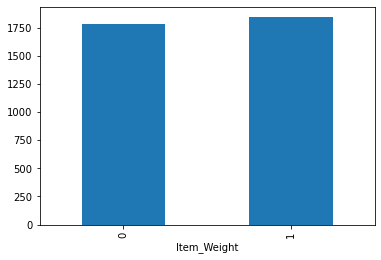

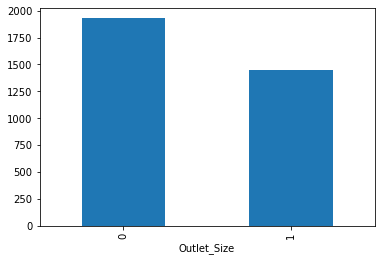

In [7]:
# Lets find the relationship between missing values and Sales Price
for feature in features_with_na:
    df = data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[feature] = np.where(df[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    df.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful 

In [8]:
# Handling the missing values

# Replacing the missing values of Item_Weight with mean of the values
data.Item_Weight.fillna(data.Item_Weight.mean(), inplace=True)

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Replacing the missing values of Outlet_Size with mode of the values
mode_Outlet_Size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [11]:
Outlet_size_missing_values = data.Outlet_Size.isnull()
Outlet_size_missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [12]:
data.loc[Outlet_size_missing_values,'Outlet_Size'] = data.loc[Outlet_size_missing_values,'Outlet_Type'].apply(lambda x: mode_Outlet_Size[x])

In [13]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
# Statistical measures of the dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Numerical Variables**

In [15]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  5


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


**Temporal Variables**(Eg: Datetime Variables) - from the Data we have 1 year variables.

In [16]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Year' in feature]
year_feature

['Outlet_Establishment_Year']

In [17]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, data[feature].unique())

Outlet_Establishment_Year [1999 2009 1998 1987 1985 2002 2007 1997 2004]


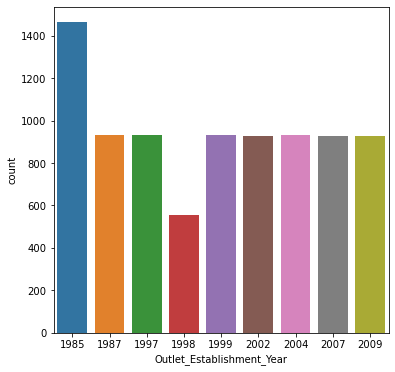

In [18]:
# distribution of Outlet_Establishment_Year values
plt.figure(figsize=(6,6))
sb.countplot(x='Outlet_Establishment_Year', data=data)
plt.show()

In [19]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median()

Outlet_Establishment_Year
1985    1845.5976
1987    2050.6640
1997    1945.8005
1998     250.3408
1999    1966.1074
2002    1834.9448
2004    2109.2544
2007    2005.0567
2009    1655.1788
Name: Item_Outlet_Sales, dtype: float64

Text(0, 0.5, 'Outlet Sales')

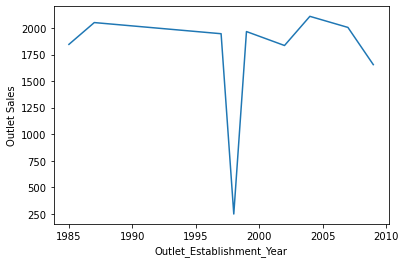

In [20]:
## Lets analyze the Outlet_Establishment_Year variable
## We will check whether there is a relation between year and the sales price

data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.ylabel('Outlet Sales')

In [21]:
# Numerical variables are usually of 2 type
# 1.Discrete Variables

discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25 and 
                    feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [22]:
# 2.Continous variables

continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature and 
                      feature not in year_feature]
print("Continuous feature Count: {}".format(len(continuous_feature)))

Continuous feature Count: 4


In [23]:
continuous_feature

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


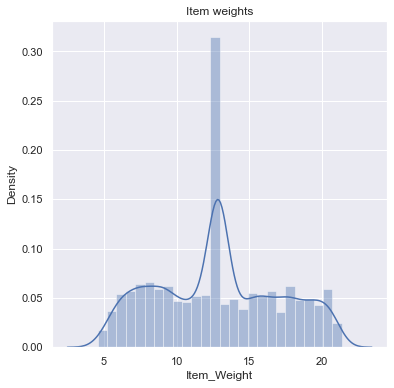

In [24]:
# distribution of Item_Weight values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.Item_Weight)
plt.title('Item weights')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


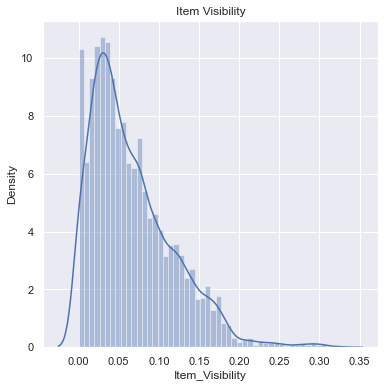

In [25]:
# distribution of Item_Visibility values
plt.figure(figsize=(6,6))
sb.distplot(data.Item_Visibility)
plt.title('Item Visibility')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


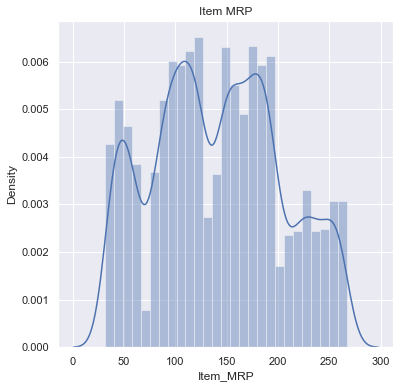

In [26]:
# distribution of Item_MRP values
plt.figure(figsize=(6,6))
sb.distplot(data.Item_MRP)
plt.title('Item MRP')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


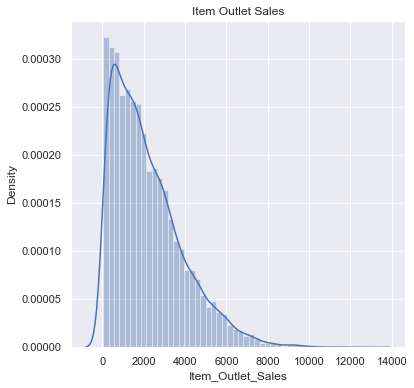

In [27]:
# distribution of Item_Outlet_Sales values
plt.figure(figsize=(6,6))
sb.distplot(data.Item_Outlet_Sales)
plt.title('Item Outlet Sales')
plt.show()

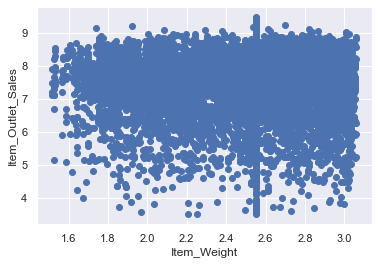

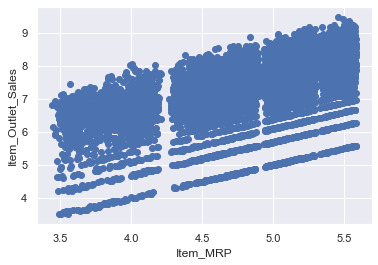

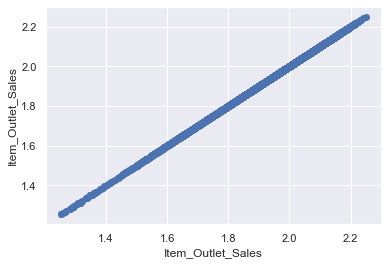

In [28]:
# We will be using logarithmic transformation

for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df['Item_Outlet_Sales'] = np.log(df['Item_Outlet_Sales'])
        plt.scatter(df[feature],df['Item_Outlet_Sales'])
        plt.xlabel(feature)
        plt.ylabel('Item_Outlet_Sales')
        plt.show()

**Outliers**

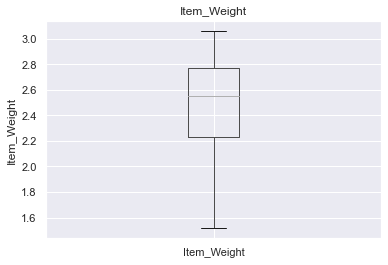

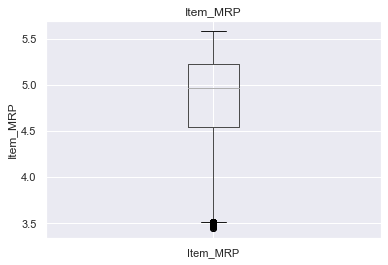

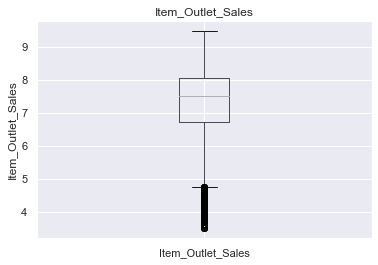

In [29]:
# only for continuous features
for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Categorical Variables**

In [30]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [31]:
data[categorical_features].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [32]:
for feature in categorical_features:
    print(feature,':',len(data[feature].unique()))

Item_Identifier : 1559
Item_Fat_Content : 5
Item_Type : 16
Outlet_Identifier : 10
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4


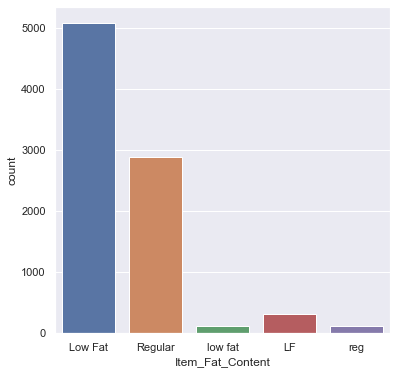

In [33]:
# distribution of Item_Fat_Content values
plt.figure(figsize=(6,6))
sb.countplot(x='Item_Fat_Content', data=data)
plt.show()

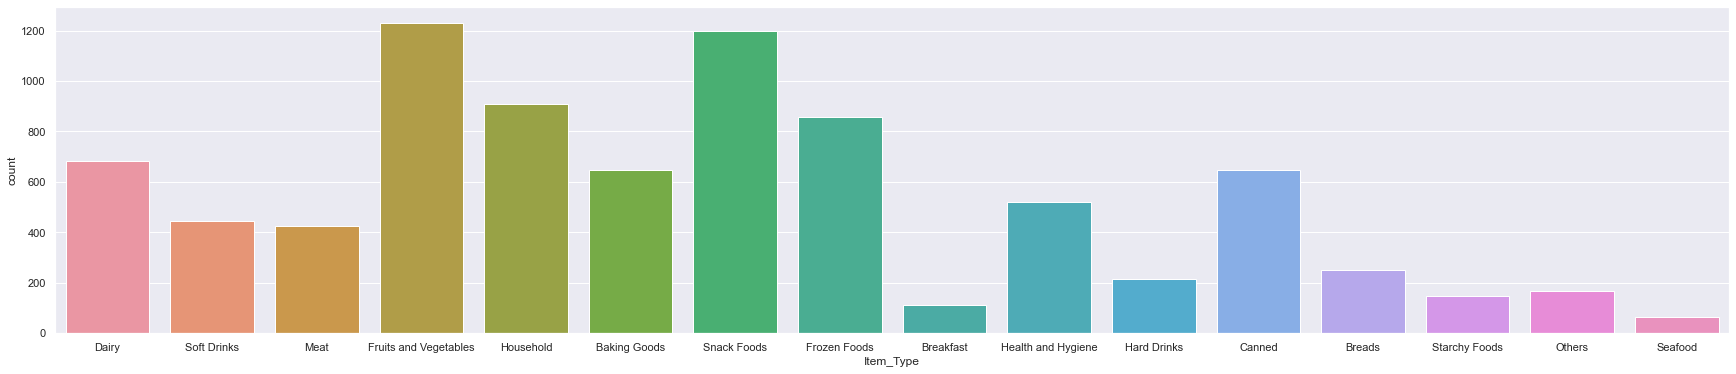

In [34]:
# distribution of Item_Type values
plt.figure(figsize=(30,6))
sb.countplot(x='Item_Type', data=data)
plt.show()

In [35]:
data.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

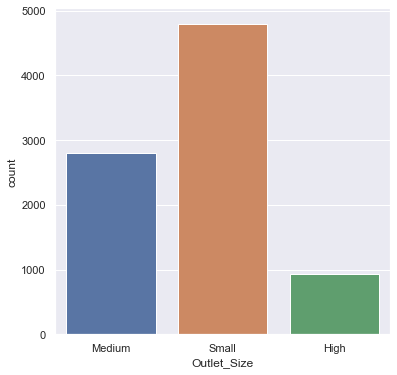

In [36]:
# distribution of Outlet_Size values
plt.figure(figsize=(6,6))
sb.countplot(x='Outlet_Size', data=data)
plt.show()

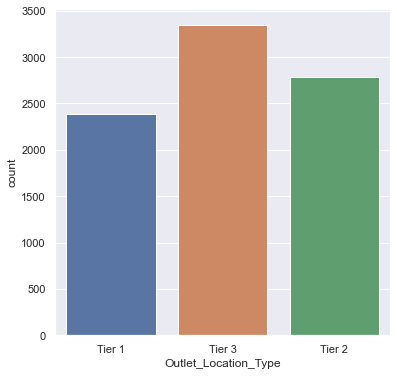

In [37]:
# distribution of Outlet_Location_Type values
plt.figure(figsize=(6,6))
sb.countplot(x='Outlet_Location_Type', data=data)
plt.show()

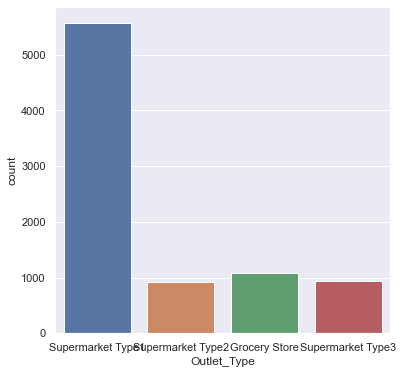

In [38]:
# distribution of Outlet_Type values
plt.figure(figsize=(6,6))
sb.countplot(x='Outlet_Type', data=data)
plt.show()

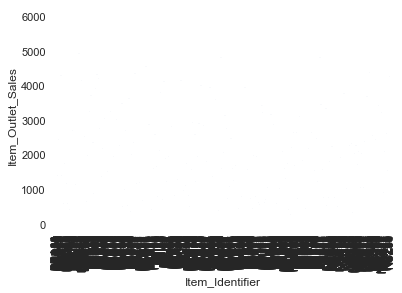

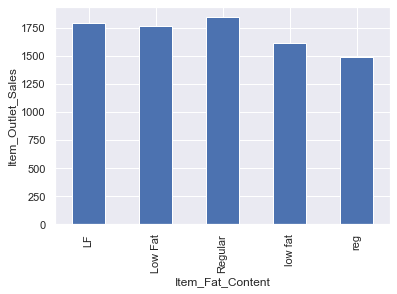

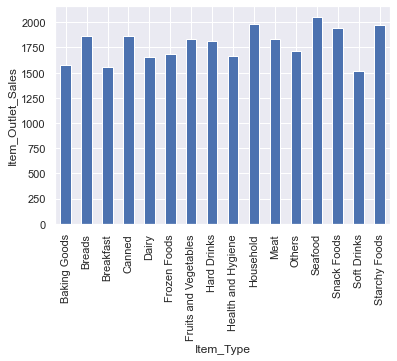

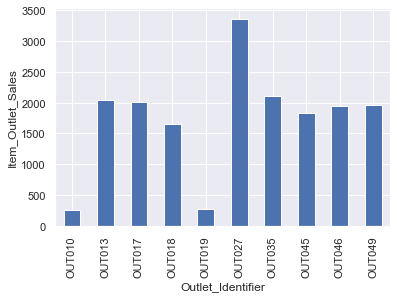

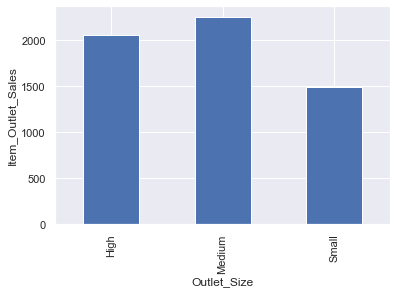

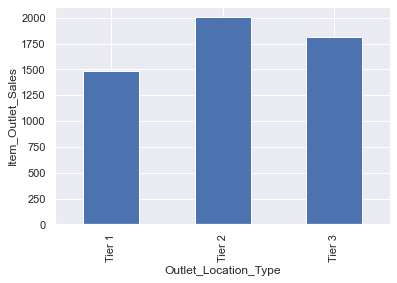

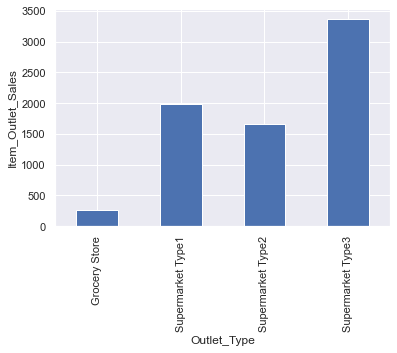

In [39]:
# relationship between categorical variable and dependent feature (Outlet Sales)

for feature in categorical_features:
    df = data.copy()
    df.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

# Feature Engineering

In [40]:
# label encoding
encoder = LabelEncoder()

In [41]:
data.Item_Identifier = encoder.fit_transform(data.Item_Identifier)

In [42]:
data.Item_Identifier

0        156
1          8
2        662
3       1121
4       1297
        ... 
8518     370
8519     897
8520    1357
8521     681
8522      50
Name: Item_Identifier, Length: 8523, dtype: int32

In [43]:
# Item Fat COntent
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [44]:
data.replace({'Item_Fat_Content':{'Low Fat':'low fat','LF':'low fat','reg':'Regular'}}, inplace=True)

In [45]:
data.Item_Fat_Content.value_counts()

low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
data.Item_Fat_Content = encoder.fit_transform(data.Item_Fat_Content)
data.Item_Type = encoder.fit_transform(data.Item_Type)
data.Outlet_Identifier = encoder.fit_transform(data.Outlet_Identifier)
data.Outlet_Size = encoder.fit_transform(data.Outlet_Size)
data.Outlet_Location_Type = encoder.fit_transform(data.Outlet_Location_Type)
data.Outlet_Type = encoder.fit_transform(data.Outlet_Type)

In [47]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,0,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,0,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**Feature Selection**

In [48]:
x = data.iloc[:,:-1]
y = data.Item_Outlet_Sales

In [49]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,0,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,0,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1


In [50]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

**Feature importance**

In [51]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor().fit(x,y)
model.feature_importances_

array([0.06862423, 0.05029358, 0.01866476, 0.07400856, 0.0561861 ,
       0.41580828, 0.02869537, 0.03113341, 0.01166034, 0.01030265,
       0.23462271])

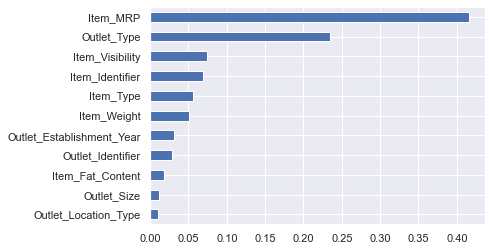

In [52]:
ranked_features = pd.Series(model.feature_importances_, index=x.columns)
ranked_features.sort_values().plot(kind='barh')
plt.show()

**Correlation**

In [53]:
x.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,1.000000,0.044518,0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001229,0.003656,-0.001178
Item_Weight,0.044518,1.000000,0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.014105,0.004088,-0.000566
Item_Fat_Content,0.114660,0.021157,1.000000,-0.047314,0.139434,-0.006063,-0.000764,-0.003151,0.001262,0.001598,-0.002199
Item_Visibility,-0.025482,-0.012049,-0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.094025,-0.028099,-0.173468
Item_Type,-0.017973,0.028015,0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.000218,0.003084,0.003053
Item_MRP,0.012853,0.024756,-0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.000872,0.000232,-0.001975
Outlet_Identifier,-0.008602,-0.007975,-0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.260272,-0.716176,0.099873
Outlet_Establishment_Year,-0.012772,-0.008301,-0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.425534,-0.089216,-0.122304
Outlet_Size,0.001229,-0.014105,0.001262,0.094025,-0.000218,0.000872,0.260272,0.425534,1.000000,-0.480075,-0.401373
Outlet_Location_Type,0.003656,0.004088,0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.480075,1.000000,0.467219


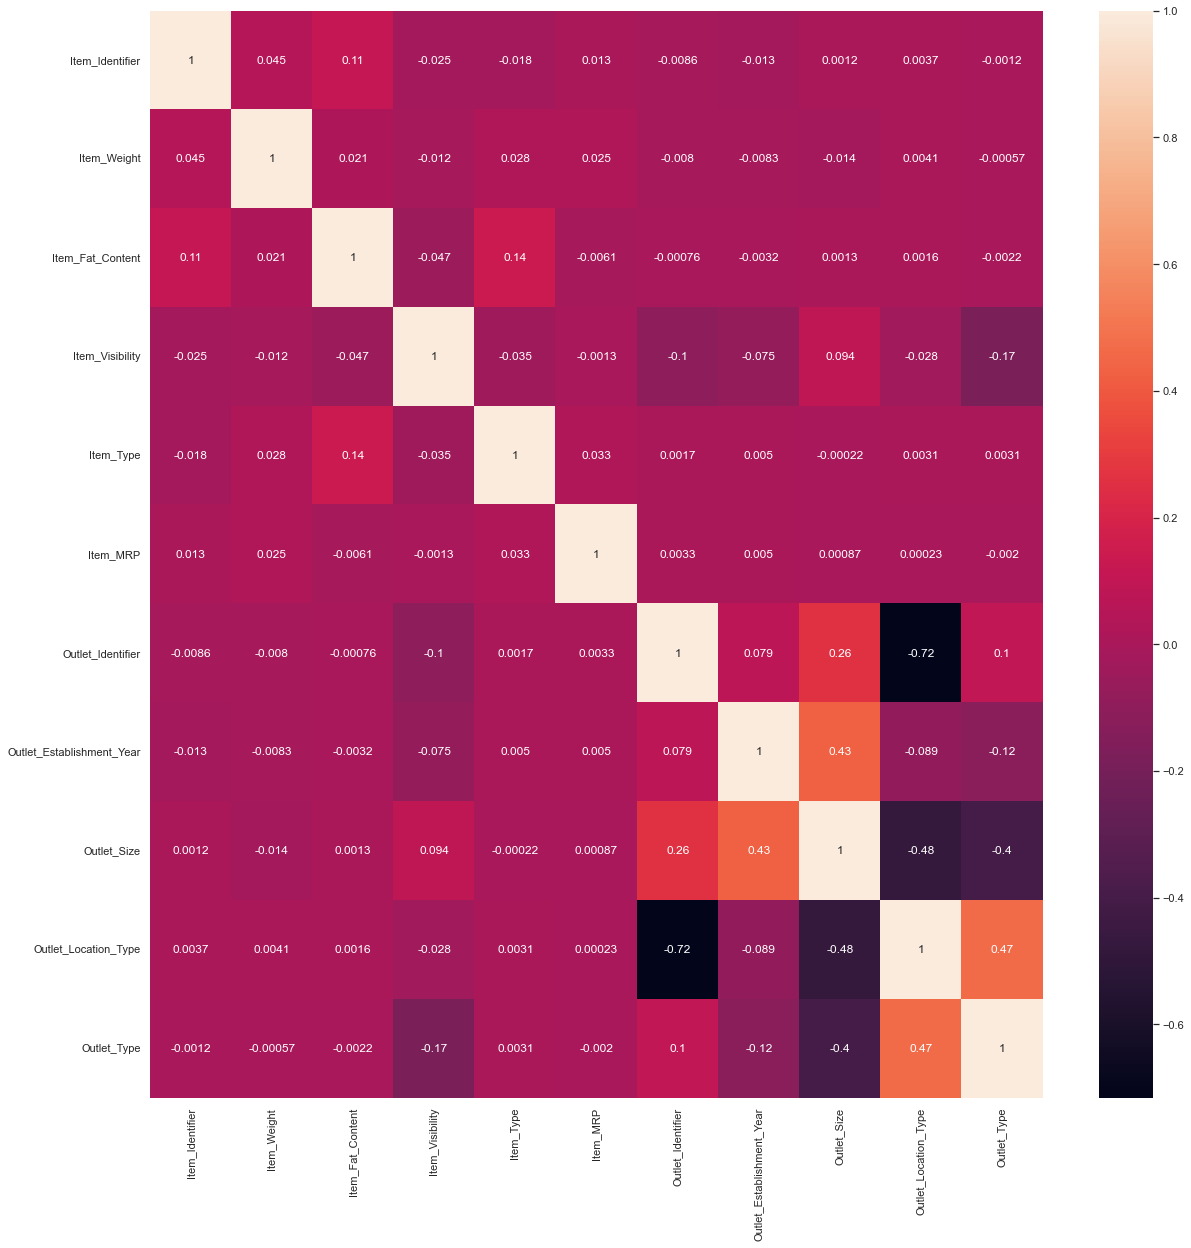

In [54]:
plt.figure(figsize=(20,20))
sb.heatmap(x.corr(), annot=True)
plt.show()

In [55]:
# lets remove the highly correlated features
threshold = 0.5

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [56]:
correlation(x,threshold)

{'Outlet_Location_Type'}

In [57]:
x.drop('Outlet_Location_Type',axis=1,inplace=True)

# Data Splitting

In [58]:
# Splitting into training data & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [59]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 10) (6818, 10) (1705, 10)


# Linear Regression

**Model Building**

In [60]:
# loading the Linear Regression Model
LR_model = LinearRegression().fit(x_train,y_train)

In [61]:
# Prediction on training data
LR_train_data_pred = LR_model.predict(x_train)

In [62]:
# R squared Value for trainig data
LR_R_sq_train = metrics.r2_score(y_train, LR_train_data_pred)
print(LR_R_sq_train)

0.5066450205626474


**Model Evaluation**

In [63]:
# Prediction on test data
LR_test_data_pred = LR_model.predict(x_test)

In [64]:
# R squared Value for test data
LR_R_sq_test = metrics.r2_score(y_test, LR_test_data_pred)
print(LR_R_sq_test)

0.48880352300226537


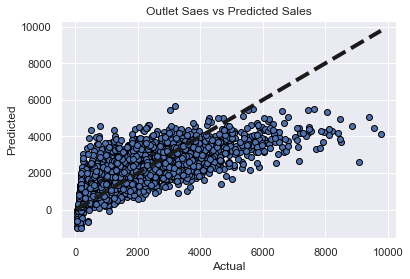

In [65]:
# Plot of predicted sales against outlet sales
fig, ax = plt.subplots()
ax.scatter(y_test, LR_test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Outlet Saes vs Predicted Sales")
plt.show()

In [66]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": LR_test_data_pred})
results.head(10)

,Actual,Predicted
1112,1544.6560,2535.354307
1751,6404.9960,3684.582871
7648,1070.6064,1218.153696
7362,369.5190,509.793328
5332,101.2016,582.610559
5509,181.0976,1431.606855
180,6024.1584,3838.837405
8065,4136.6154,3357.653115
8301,5806.4418,4739.002003
6617,1338.2580,1447.391782


In [67]:
print("Coefficient of determination : ", metrics.r2_score(y_test, LR_test_data_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, LR_test_data_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, LR_test_data_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, LR_test_data_pred))

Coefficient of determination :  0.48880352300226537
Mean Squared Error :  1578101.7162185037
Root Mean Squared Error :  1256.2251853145215
Mean Absolute Error :  945.7197616628367


**Interpretation**
- From the R-squared value, we observe that our Linear Regression model is accurate to 48%.
- As the mean square error, Root mean sqaure error & mean absolute error values are not close to 0, which indicates that the Linear Regression model is not good in predicting the Outet sales.

# Decision Tree Regressor

**Model Building**

In [68]:
# Loading decision tree Model
from sklearn.tree import DecisionTreeRegressor

# loading the Model
tree_model = DecisionTreeRegressor().fit(x_train,y_train)

In [69]:
# R squared Value for trainig data

tree_train_pred = tree_model.predict(x_train)
tree_R2_train = metrics.r2_score(y_train, tree_train_pred)
print(tree_R2_train)

1.0


**Model Evaluation**

In [70]:
# R squared Value for test data

tree_test_pred = tree_model.predict(x_test)
tree_R2_test = metrics.r2_score(y_test, tree_test_pred)
print(tree_R2_test)

0.15537121713876556


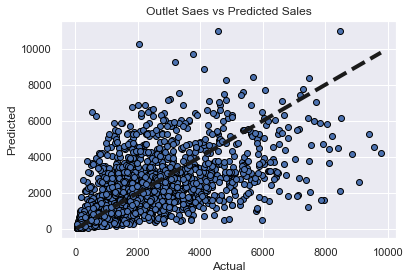

In [71]:
# Plot of predicted sales against outlet sales

fig, ax = plt.subplots()
ax.scatter(y_test, tree_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Outlet Saes vs Predicted Sales")
plt.show()

In [72]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": tree_test_pred})
results.head(10)

,Actual,Predicted
1112,1544.6560,2450.1440
1751,6404.9960,3202.4980
7648,1070.6064,2498.0816
7362,369.5190,123.1730
5332,101.2016,487.3656
5509,181.0976,181.0976
180,6024.1584,3611.2992
8065,4136.6154,4407.5960
8301,5806.4418,4976.8550
6617,1338.2580,1061.9510


In [73]:
print("Coefficient of determination : ", metrics.r2_score(y_test, tree_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, tree_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, tree_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, tree_test_pred))

Coefficient of determination :  0.15537121713876556
Mean Squared Error :  2607432.155301741
Root Mean Squared Error :  1614.7545185884264
Mean Absolute Error :  1135.1636175953079


**Interpretation**
- From the R-squared value, we observe that our decision Tree Regressor model not suitable for this prediction purpose.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the Desion Tree Regressor model is not good in predicting the Outlet Sales.

# Random Forest Regressor

**Model Building**

In [74]:
# Loading random forest Model
from sklearn.ensemble import RandomForestRegressor

# loading the Model
rf_model = RandomForestRegressor(n_estimators=500, max_features='sqrt').fit(x_train,y_train)

# R squared Value for trainig data
rf_train_pred = rf_model.predict(x_train)
rf_R2_train = metrics.r2_score(y_train, rf_train_pred)
print(rf_R2_train)

0.9429073696391266


In [75]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_estimators':[100,200,300,400,500,600]}]
search = GridSearchCV(rf_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.4min finished


In [76]:
# optimum parameter values
search.best_params_

{'n_estimators': 600}

In [77]:
rf_model = RandomForestRegressor(n_estimators=600, max_features='sqrt').fit(x_train,y_train)

In [78]:
# R squared Value for trainig data

rf_train_pred = rf_model.predict(x_train)
rf_R2_train = metrics.r2_score(y_train, rf_train_pred)
print(rf_R2_train)

0.9427144006593043


**Model Evaluation**

In [79]:
# R squared Value for test data

rf_test_pred = rf_model.predict(x_test)
rf_R2_test = metrics.r2_score(y_test, rf_test_pred)
print(rf_R2_test)

0.5742228678817707


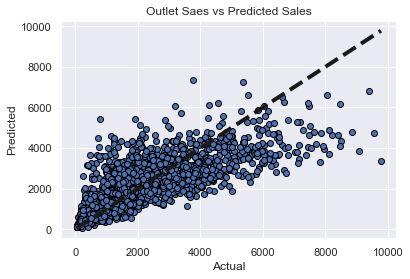

In [80]:
# Plot of predicted sales against outlet sales

fig, ax = plt.subplots()
ax.scatter(y_test, rf_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Outlet Saes vs Predicted Sales")
plt.show()

In [81]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": rf_test_pred})
results.head(10)

,Actual,Predicted
1112,1544.6560,2556.940539
1751,6404.9960,3217.289857
7648,1070.6064,1537.860401
7362,369.5190,271.218069
5332,101.2016,272.417618
5509,181.0976,374.512500
180,6024.1584,4162.878991
8065,4136.6154,3812.648217
8301,5806.4418,4991.470420
6617,1338.2580,1689.264431


In [82]:
print("Coefficient of determination : ", metrics.r2_score(y_test, rf_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, rf_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, rf_test_pred))

Coefficient of determination :  0.5742228678817707
Mean Squared Error :  1314405.8168564958
Root Mean Squared Error :  1146.4753886832877
Mean Absolute Error :  802.3617589884651


**Interpretation**
- From the R-squared value, we observe that our Random Forest model is accurate to 57%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the Random Forest model is not good in predicting the Outlet Sales.

# Support Vector Machine Model

**Model Building**

In [83]:
# Loading Support Vector Machine Model
from sklearn import svm

SVM_model = svm.SVR(kernel='linear').fit(x_train,y_train)

In [84]:
# Prediction on training data
SVM_train_data_pred = SVM_model.predict(x_train)

In [85]:
# R squared Value for trainig data
SVM_R_sq_train = metrics.r2_score(y_train, SVM_train_data_pred)
print(SVM_R_sq_train)

0.4807367251149136


**Model Evaluation**

In [86]:
# Prediction on test data
SVM_test_data_pred = SVM_model.predict(x_test)

In [87]:
# R squared Value for test data
SVM_R_sq_test = metrics.r2_score(y_test, SVM_test_data_pred)
print(SVM_R_sq_test)

0.453784673954169


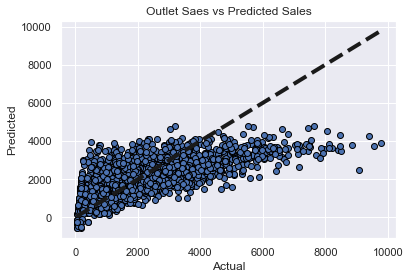

In [88]:
# Plot of predicted sales against outlet sales
fig, ax = plt.subplots()
ax.scatter(y_test, SVM_test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Outlet Saes vs Predicted Sales")
plt.show()

In [89]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": SVM_test_data_pred})
results.head(10)

,Actual,Predicted
1112,1544.6560,2048.845607
1751,6404.9960,3570.700970
7648,1070.6064,1304.942688
7362,369.5190,758.243367
5332,101.2016,726.639233
5509,181.0976,1548.233732
180,6024.1584,3198.623991
8065,4136.6154,3191.124234
8301,5806.4418,4065.746971
6617,1338.2580,1330.342390


In [90]:
print("Coefficient of determination : ", metrics.r2_score(y_test, SVM_test_data_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, SVM_test_data_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, SVM_test_data_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, SVM_test_data_pred))

Coefficient of determination :  0.453784673954169
Mean Squared Error :  1686207.519504473
Root Mean Squared Error :  1298.5405344094859
Mean Absolute Error :  952.8842330398182


**Interpretation**
- From the R-squared value, we observe that our SVM Regressor model is accurate to 45%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the SVM Regressor model is not good in predicting the Outlet Sales.

# KNN Regressor

**Model Building**

In [91]:
# Loading KNN Model
from sklearn.neighbors import KNeighborsRegressor

# loading the Model
KNN_model = KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)

# R squared Value for trainig data
KNN_train_pred = KNN_model.predict(x_train)
KNN_R2_train = metrics.r2_score(y_train, KNN_train_pred)
print(KNN_R2_train)

0.4605657159785649


In [92]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15]}]
search = GridSearchCV(KNN_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.4s finished


In [93]:
# optimum parameter values
search.best_params_

{'n_neighbors': 15}

In [94]:
KNN_model = KNeighborsRegressor(n_neighbors=15).fit(x_train,y_train)

In [95]:
# R squared Value for trainig data

KNN_train_pred = KNN_model.predict(x_train)
KNN_R2_train = metrics.r2_score(y_train, KNN_train_pred)
print(KNN_R2_train)

0.3771063539234628


**Model Evaluation**

In [96]:
# R squared Value for test data

KNN_test_pred = KNN_model.predict(x_test)
KNN_R2_test = metrics.r2_score(y_test, KNN_test_pred)
print(KNN_R2_test)

0.2598258847189733


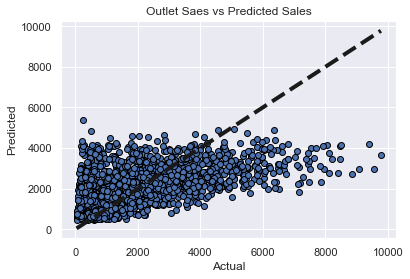

In [97]:
# Plot of predicted sales against outlet sales
fig, ax = plt.subplots()
ax.scatter(y_test, KNN_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Outlet Saes vs Predicted Sales")
plt.show()

In [98]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": KNN_test_pred})
results.head(10)

,Actual,Predicted
1112,1544.6560,1454.595453
1751,6404.9960,4405.909307
7648,1070.6064,1220.766493
7362,369.5190,1522.906533
5332,101.2016,1862.375760
5509,181.0976,3182.923480
180,6024.1584,2184.578573
8065,4136.6154,3270.010120
8301,5806.4418,2860.054867
6617,1338.2580,1272.743280


In [99]:
print("Coefficient of determination : ", metrics.r2_score(y_test, KNN_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, KNN_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, KNN_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, KNN_test_pred))

Coefficient of determination :  0.2598258847189733
Mean Squared Error :  2284972.7926248545
Root Mean Squared Error :  1511.6126463564847
Mean Absolute Error :  1105.4282997145651


**Interpretation**
- From the R-squared value, we observe that our KNN Regressor model not suitable for this prediction purpose.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the KNN Regressor model is not good in predicting the Outlet Sales.

# Comparison

Decreasing order of R-square values are depicted as:

- Random Forest Regressor - 0.5742
- Linear Reression - 0.4888
- SVM Regressor - 0.4537
- KNN Regressor - 0.2598
- Decision Tree Regressor - 0.1554

The results are highly clear none of the models are good in predicting the sales. Random Forest Regressor is slightly better than the remaining models for the given data.